# Use-case 2: Encoding (non-hierarchical) individual layers. Example: Köppen-Geoger Climate Classification

The Köppen-Geiger climate classes are constructed using three main characteristics based on "Main climates", "Precipitation" and "Temperature. See the map below.

In [1]:
%matplotlib inline

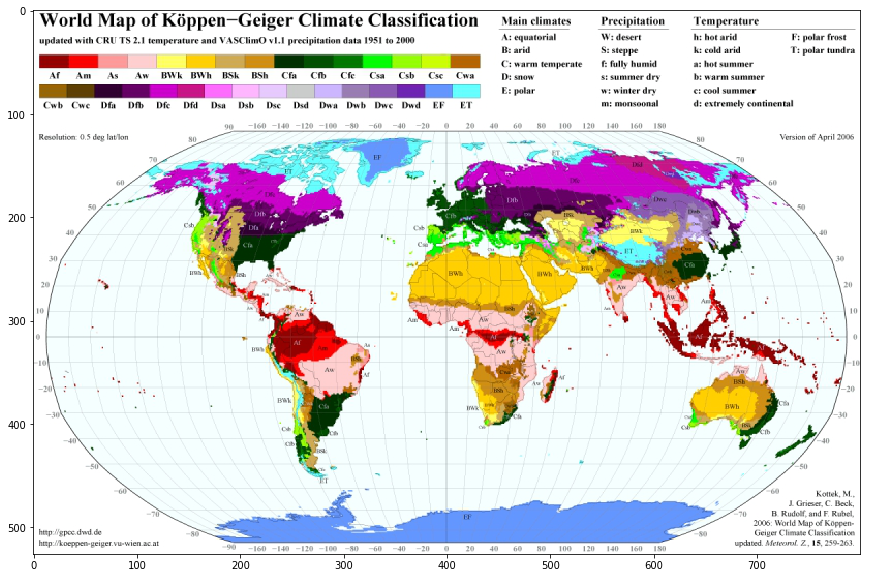

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#
# We need to adjust the path since we are in the sub-folder "example"
# and import the python module from a relative path, not the installed
# version.
#
import sys
sys.path.append("..")

image = mpimg.imread("../../data/ClimateZones/Kottel/Koeppen-Geiger-Overview.jpg")
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

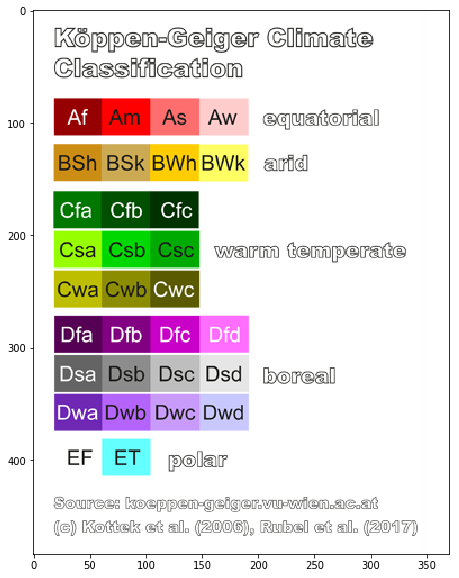

In [4]:
image = mpimg.imread("../../data/ClimateZones/Kottel/Legend_Global.png")
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

## Encoding Köppen-Geiger map using pythemap



Prepare and import the pre-processed data

In [5]:
#
# Import numpy and pythemap geo functions
#
import numpy
from pythemap import geo

#
# Generate a new raster layer
#
r = geo.Raster()

#
# Generate a new legend. In pythemap, the data is not necessarily
# human-readable and the legend is required to be able to traverse
# to the datums and extract the values.
#
legend = geo.Legend()

#
# This is how the legend is encoded, the legend type is "layers"
#
root =  {
        "metadata":{
            "type":"layers"
        },
        "items": {
            "climate":{
                "A":{},
                "B":{},
                "C":{},
                "D":{},
                "E":{}
            },
            "precipitation":{
                "W":{},
                "S":{},
                "f":{},
                "s":{},
                "w":{},
                "m":{},
            },
            "temperature":{
                "h":{},
                "k":{},
                "a":{},
                "b":{},
                "c":{},
                "d":{},
                "F":{},
                "T":{},
            }
        }
    }

#
# Add the json to the layer class. It will be remembered and used in future
# to encode/decode/mask the data
#
legend.put(root)

#
# The non-encoded Köppen-Geiger climate classification data was pre-processed
# and can be imported here as numpy array.
#
a = numpy.load("../../data/ClimateZones/ClimateZones_nd.npy")

This is the heart of the mechanism. With the "encode" command, the layers can be encoded and compressed into a single layer

In [6]:
encoded = r.encode(a, legend, False)

Based on the encoded layer, it is possible to create several masks. Here, we want to extract data, which have polar climate (represented in the Köppen-Geiger climate classification system using the capital letter "E"). 

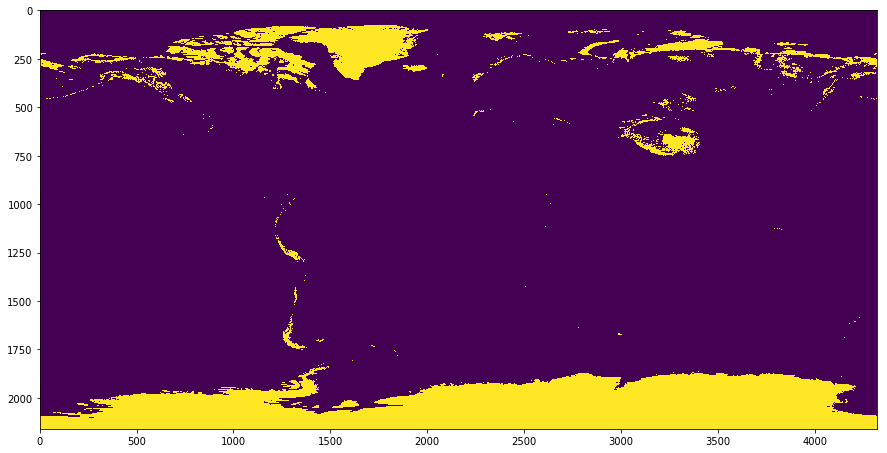

In [33]:
mask = r.mask("E", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

It is also possible to extract all areas which are either desert (capital letter "W") or steppe (capital letter "S).

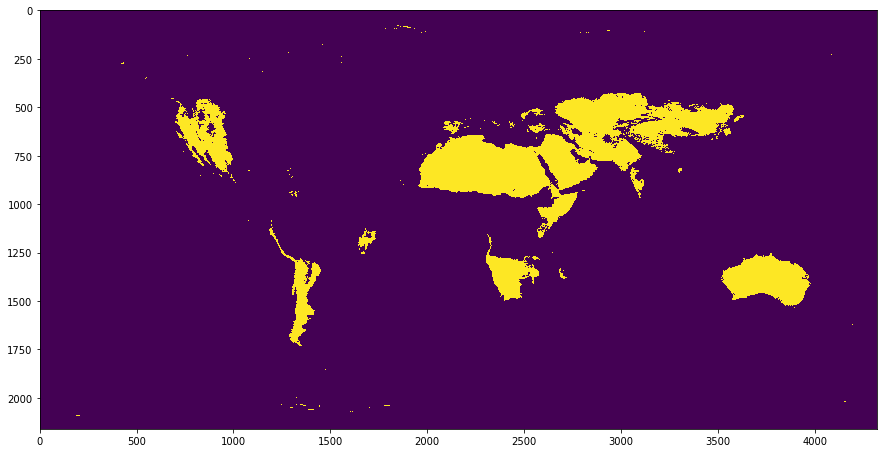

In [29]:
mask = r.mask(["W","S"], encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

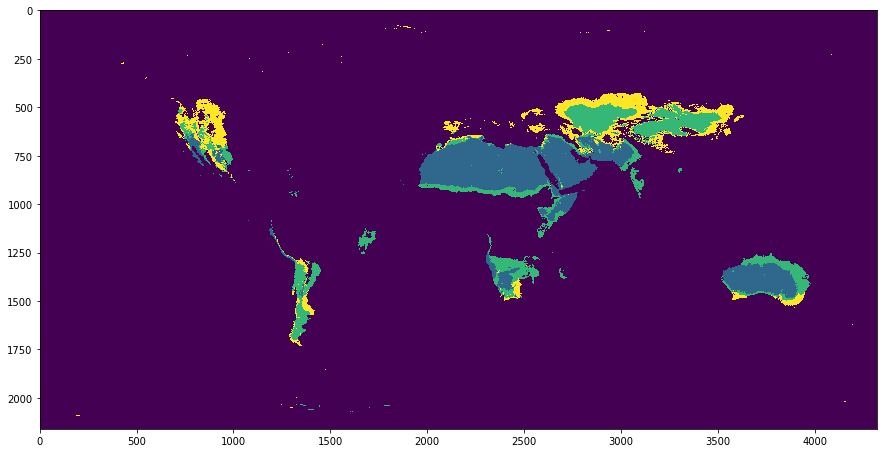

In [9]:
mask = r.mask(["B","S","k"], encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

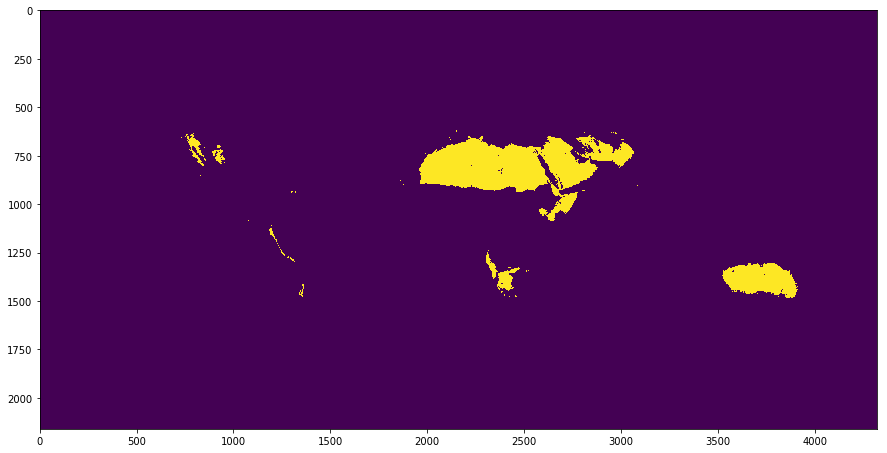

In [31]:
mask = r.mask(["B","W","h"], encoded, legend, logic = "AND")
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

At this point the maximum value in the encoded dataset is ...

In [11]:
numpy.max(encoded)

38909

... which allows to store the data in 16-bit depth.